# Ukraine Russia War Twitter Sentiment Analysis

let’s import the necessary Python libraries and the dataset 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1630366235354451969  1630152070530576385  2023-02-28 00:36:15 UTC   
1  1630366226424778753  1630366226424778753  2023-02-28 00:36:13 UTC   
2  1630366225930027011  1630366225930027011  2023-02-28 00:36:13 UTC   
3  1630366223056662530  1630351686974992385  2023-02-28 00:36:12 UTC   
4  1630366221483884545  1629903982255644672  2023-02-28 00:36:12 UTC   

         date      time  timezone              user_id     username  \
0  2023-02-28  00:36:15         0  1493761817406894086  tomasliptai   
1  2023-02-28  00:36:13         0  1526694166662721536  paperfloure   
2  2023-02-28  00:36:13         0  1053018392939167746    katetbar1   
3  2023-02-28  00:36:12         0            602371247    jlhrdhmom   
4  2023-02-28  00:36:12         0  1053594763214184448    phemikali   

                  name place  ... geo source user_rt_id user_rt retweet_id  \
0         Tomas Liptai   NaN  ... NaN    NaN        NaN     Na

# Let’s have a quick look at all the column names of the dataset:



In [2]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


# We only need three columns for this task (username, tweet, and language); I will only select these columns and move forward:

In [5]:
data = data[["username", "tweet", "language"]]

# Let’s have a look at whether any of these columns contains any null values or not

In [6]:
print(data.isnull().sum())

username    0
tweet       0
language    0
dtype: int64


# let’s have a quick look at how many tweets are posted in which language:

In [7]:
data["language"].value_counts()

language
en     8858
pt      440
it      194
qme     105
und      60
in       47
ru       44
ja       42
es       36
qht      20
ca       20
th       19
fr       18
de       14
ko        9
nl        8
vi        8
fi        7
ro        7
cs        6
zxx       6
uk        6
ar        6
zh        5
pl        5
qam       4
tl        4
da        3
hi        2
tr        2
no        2
eu        2
el        1
lv        1
hu        1
cy        1
bn        1
Name: count, dtype: int64

# Let’s prepare this data for the task of sentiment analysis. Here I will remove all the links, punctuation, symbols and other language errors from the tweets

In [8]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\Mohamed
[nltk_data]     Adel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war:

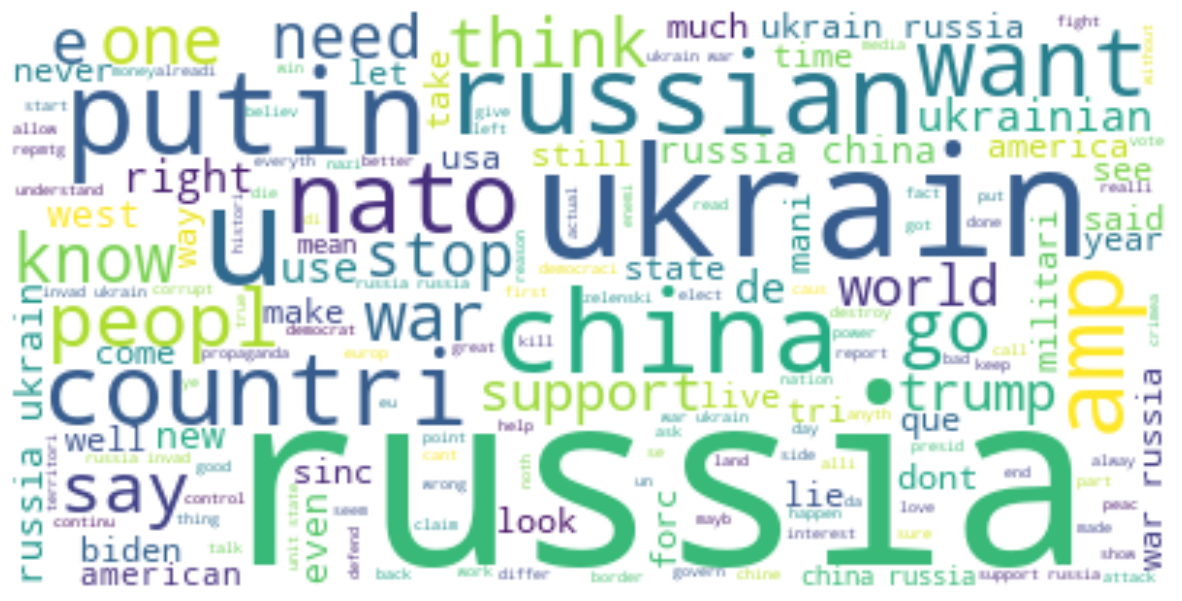

In [9]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets

In [10]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Mohamed
[nltk_data]     Adel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0      nazijaeg derwen  russia place satan rule well     0.259     0.000   
1  russia haarp could destroy usa one fell swoop ...     0.000     0.280   
2       putin give steven seagal  order friendship       0.367     0.000   
3       mainelif baddcompani it alway project russia     0.000     0.000   
4  pottingpink mfarussia modrussia milhistrf muze...     0.068     0.078   

   Neutral  
0    0.741  
1    0.720  
2    0.633  
3    1.000  
4    0.854  


#  let’s have a look at the most frequent words used by people with positive sentiments:

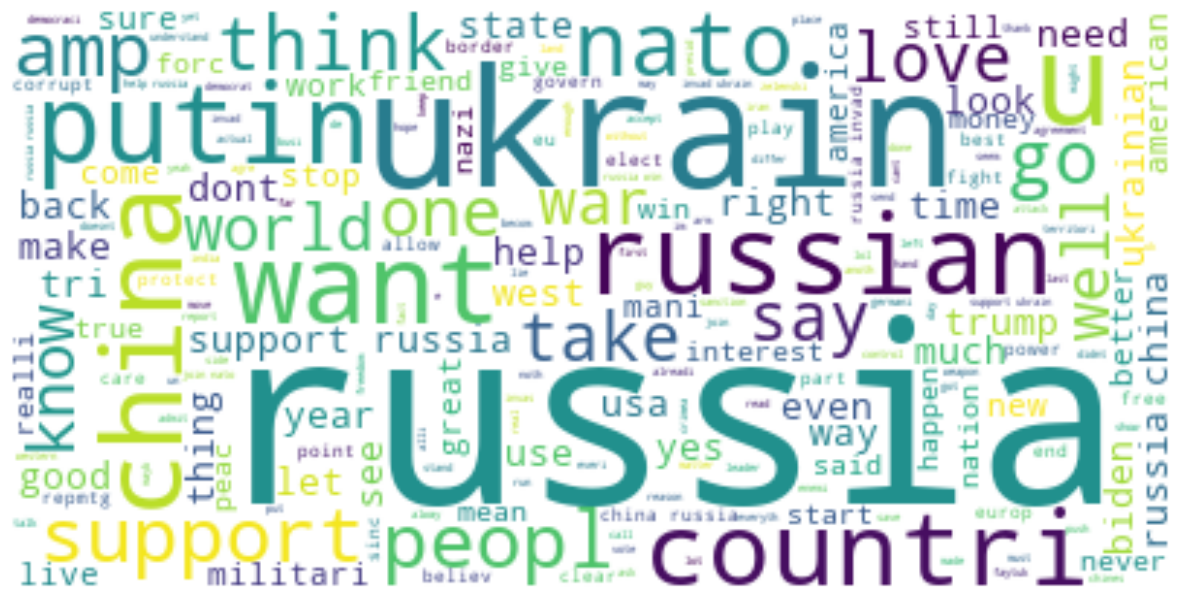

In [11]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# let’s have a look at the most frequent words used by people with negative sentiments

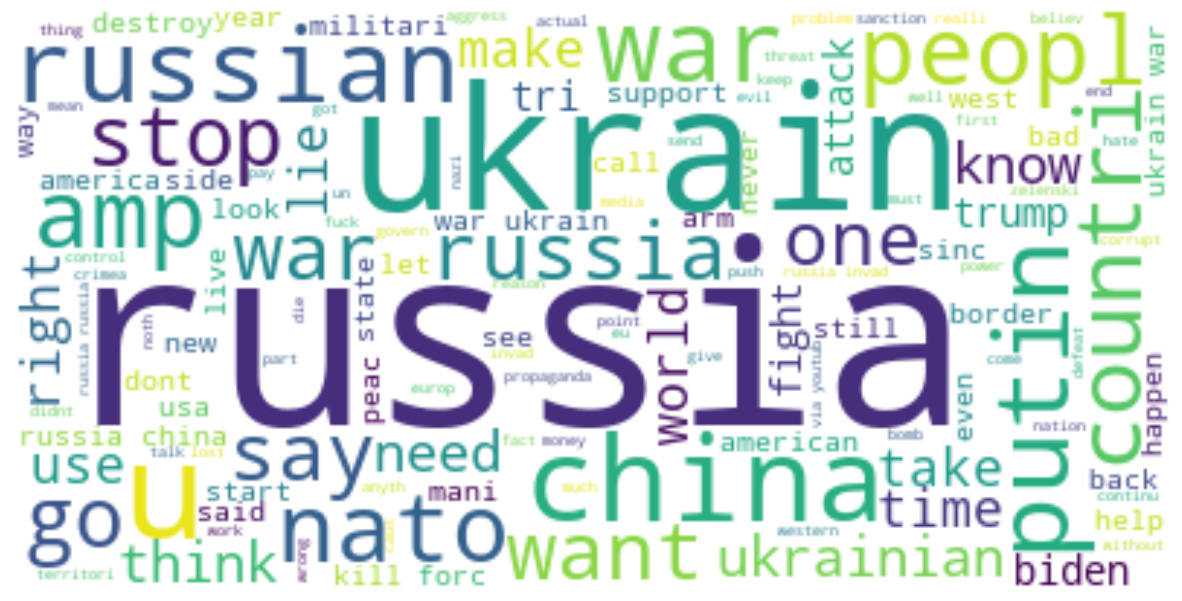

In [12]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# let’s have a look at the most frequent words used by people with natural sentiments

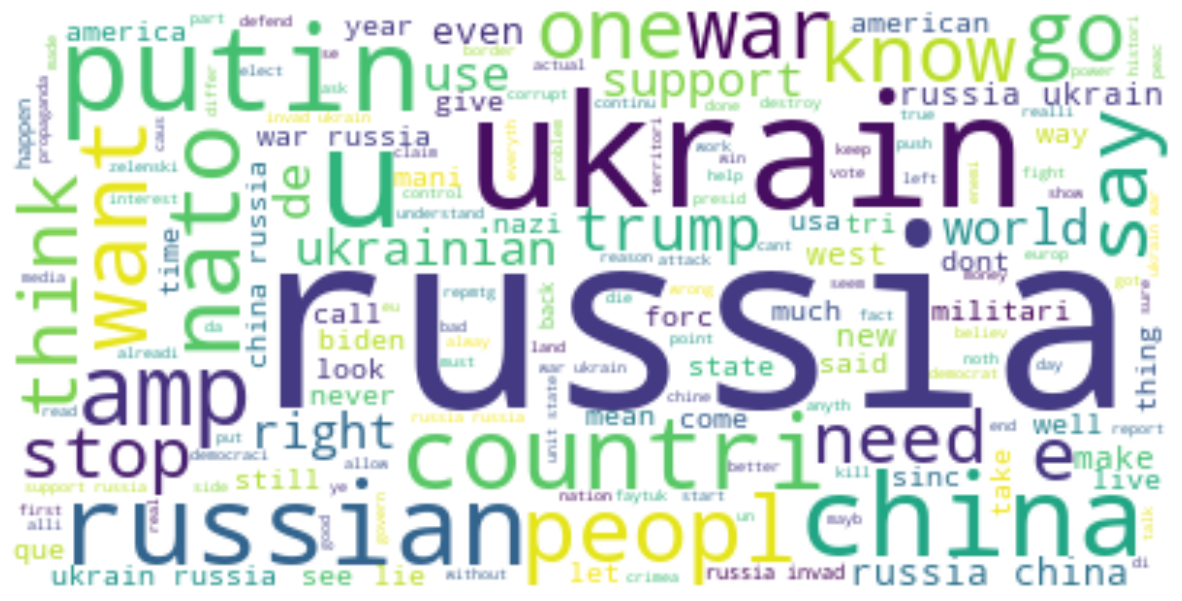

In [18]:
neutral =' '.join([i for i in data['tweet'][data["Neutral"] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(neutral)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Summary
There are a lot of tweets about the Ukraine and Russia war where people tend to update about the ground truths, what they feel about it, and who they are supporting. I used those tweets for the task of Twitter sentiment analysis on the Ukraine and Russia war